In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O6','C6']
psi_dihedral=['C1','O6','C6','C5']

di_sugar=['GLA', 'GLC']
patterns1= ['GLA(*_*_)]-GLC(*_*_)', 'GLA(*_*_)-GLC(*_*_)','GLA(*_*_)]-[*]-GLC(*_*_)', 'GLA(*_*_)-[*]-GLC(*_*_)']
patterns2= ['DGalpa1-6DGlcpa', 'DGalpa1-6]DGlcpa', 'DGalpa1-6[*]DGlcpa']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-6D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A7C', '1ABR', '1ABR', '1AGM', '1AH1', '1AU1', '1AU1', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1B0F', '1B0F', '1B37', '1B41', '1B5F', '1B5Q', '1BHG', '1BHG', '1BLF', '1BRR', '1BRR', '1BZB', '1C1Z', '1CDR', '1CF5', '1CF5', '1CKL', '1CKL', '1CKL', '1CKL', '1CPO', '1CVI', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CVU', '1CVU', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWF', '1DWG', '1DWH', '1DWI', '1DWJ', '1DZE', '1E04', '1E05', '1E4K', '1E4K', '1E6Q', '1E6S', '1EOM', '1ETH', '1ETH', '1EX1', '1F6A', '1F6A', '1F6A', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1F8R', '1F8R', '1F8R', '1FC1', '1FC1', '1FC2', '1FE2', '1FE8', '1FE8', '1FE8', '1FI1', '1FRT', '1FRT', '1FUJ', '1FUJ', '1FUJ', '1FUJ', '1FX5', '1FZD', '1FZD', '1FZD', '1FZD', '1G0V', '1G6I', '1G6I

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 87 
valid torsion1 and torsion2: (87, 87)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['3.E', '1.E'], ['4C1', '4C1'])
(['3.G', '1.G'], ['4C1', '4C1'])
(['3.F', '1.F'], ['4C1', '4C1'])
(['3.H', '1.H'], ['4C1', '4C1'])
(['3.K', '1.K'], ['4C1', '4C1'])
(['3.M', '1.M'], ['4C1', '4C1'])
(['3.L', '1.L'], ['4C1', '4C1'])
(['3.N', '1.N'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['1.D', '2.D'], ['4C1', '4C1'])
(['1.C', '2.C'], ['4C1', '4C1'])
(['2.G', '1.G'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['3.D', '2.D'], ['4C1', '4C1'])
(['3.C', '2.C'], ['4C1', '-'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '-'])
(['2.G', '3.G'], ['BO3', '-'])
(['2.H', '3.H'], ['1S3', '-'])
(['2.F', '3.F'], ['1S3', '4C1'])
(['2.E', '3.E'], ['1C4', '4C1'])
(['2.R', '1.R'], ['4C1', '4C1'])
(['2.J', '1.J'], ['4C1', '4C1'])
(['2.N', '1.N'], ['4C1', '4C1'])
(['2.L', '1.L'], ['4C1', '4C1'])
(['2.H', '1.H'], ['4C1', '4C1'])
(['2.P', '1.P'], ['4C1', '4C1'])
(['2.H', '1.H'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['2.G', '1.G'], [

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//6pql.pdb E GLA 3 C1
../../pdbs//6pql.pdb E GLC 1 O6
11817 11804
Connection found between(2) 11817 and 11804
../../pdbs//6pql.pdb G GLA 3 C1
../../pdbs//6pql.pdb G GLC 1 O6
11885 11872
Connection found between(2) 11885 and 11872
../../pdbs//6pql.pdb F GLA 3 C1
../../pdbs//6pql.pdb F GLC 1 O6
11851 11838
Connection found between(2) 11851 and 11838
../../pdbs//6pql.pdb H GLA 3 C1
../../pdbs//6pql.pdb H GLC 1 O6
11919 11906
Connection found between(2) 11919 and 11906
../../pdbs//3lrm.pdb K GLA 3 C1
../../pdbs//3lrm.pdb K GLC 1 O6
14256 14243
Connection found between(2) 14256 and 14243
../../pdbs//3lrm.pdb M GLA 3 C1
../../pdbs//3lrm.pdb M GLC 1 O6
14324 14311
Connection found between(2) 14324 and 14311
../../pdbs//3lrm.pdb L GLA 3 C1
../../pdbs//3lrm.pdb L GLC 1 O6
14290 14277
Connection found between(2) 14290 and 14277
../../pdbs//3lrm.pdb N GLA 3 C1
../../pdbs//3lrm.pdb N GLC 1 O6
14358 14345
Connection found between(2) 14358 and 14345
../../pdbs//6prg.pdb D GLA 2 C1
../../pd

In [13]:
output_df.to_csv('DGalpa1-6DGlcpa_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DGalpa1-6DGlcpa_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,6pql.pdb,E GLA 3 C2 C1 GLC 1 O6 C6,E GLA 3 C1 GLC 1 O6 C6 C5,198.5530,212.7170,"([GLA(3_E_), GLC(1_E_)], [30.14, 30.59])",GLA(3_E_)-GLC(1_E_)-FRU(2_E_),DGalpa1-6DGlcpa2-1DFrufb,"([3.E, 1.E], [4C1, 4C1])"
1,6pql.pdb,G GLA 3 C2 C1 GLC 1 O6 C6,G GLA 3 C1 GLC 1 O6 C6 C5,195.6310,214.0120,"([GLA(3_G_), GLC(1_G_)], [37.7, 36.6])",GLA(3_G_)-GLC(1_G_)-FRU(2_G_),DGalpa1-6DGlcpa2-1DFrufb,"([3.G, 1.G], [4C1, 4C1])"
2,6pql.pdb,F GLA 3 C2 C1 GLC 1 O6 C6,F GLA 3 C1 GLC 1 O6 C6 C5,199.8980,209.7240,"([GLA(3_F_), GLC(1_F_)], [34.7, 33.13])",GLA(3_F_)-GLC(1_F_)-FRU(2_F_),DGalpa1-6DGlcpa2-1DFrufb,"([3.F, 1.F], [4C1, 4C1])"
3,6pql.pdb,H GLA 3 C2 C1 GLC 1 O6 C6,H GLA 3 C1 GLC 1 O6 C6 C5,198.2350,212.3830,"([GLA(3_H_), GLC(1_H_)], [38.14, 37.28])",GLA(3_H_)-GLC(1_H_)-FRU(2_H_),DGalpa1-6DGlcpa2-1DFrufb,"([3.H, 1.H], [4C1, 4C1])"
4,3lrm.pdb,K GLA 3 C2 C1 GLC 1 O6 C6,K GLA 3 C1 GLC 1 O6 C6 C5,249.2080,211.7770,"([GLA(3_K_), GLC(1_K_)], [75.21, 75.62])",GLA(3_K_)-GLC(1_K_)-FRU(2_K_),DGalpa1-6DGlcpa2-1DFrufb,"([3.K, 1.K], [4C1, 4C1])"
...,...,...,...,...,...,...,...,...,...
82,8beu.pdb,L GLA 3 C2 C1 GLC 2 O6 C6,L GLA 3 C1 GLC 2 O6 C6 C5,191.8100,177.7770,"([GLA(3_L_), GLC(2_L_)], [78.62, 42.03])",GLA(3_L_)-GLC(2_L_)-FRU(1_L_),DGalpa1-6DGlcpa2-1DFrufb,"([3.L, 2.L], [-, 4C1])"
83,2fcp.pdb,B GLA 7 C2 C1 GLC 6 O6 C6,B GLA 7 C1 GLC 6 O6 C6 C5,179.0770,307.7685,"([GLA(7_B_), GLC(6_B_)], [110.34, 98.3])",GLA(8_B_)-[GLA(7_B_)]-GLC(6_B_)-GPH(5_B_)-GMH(...,DGalpa1-3[DGalpa1-6]DGlcpa1-3GPH1-3GMH1-5[DKdo...,"([7.B, 6.B], [1S3, 4C1])"
84,2fcp.pdb,B GLA 8 C2 C1 GLC 6 O6 C6,B GLA 8 C1 GLC 6 O6 C6 C5,90.4478,177.5070,"([GLA(8_B_), GLC(6_B_)], [112.72, 98.3])",GLA(8_B_)-[GLA(7_B_)]-GLC(6_B_)-GPH(5_B_)-GMH(...,DGalpa1-3[DGalpa1-6]DGlcpa1-3GPH1-3GMH1-5[DKdo...,"([8.B, 6.B], [4C1, 4C1])"
85,5fkc.pdb,J GLA 3 C2 C1 GLC 2 O6 C6,J GLA 3 C1 GLC 2 O6 C6 C5,184.2580,178.4140,"([GLA(3_J_), GLC(2_J_)], [28.24, 22.75])",GLA(3_J_)-GLC(2_J_)-FRU(1_J_),DGalpa1-6DGlcpa2-1DFrufb,"([3.J, 2.J], [4C1, 4C1])"


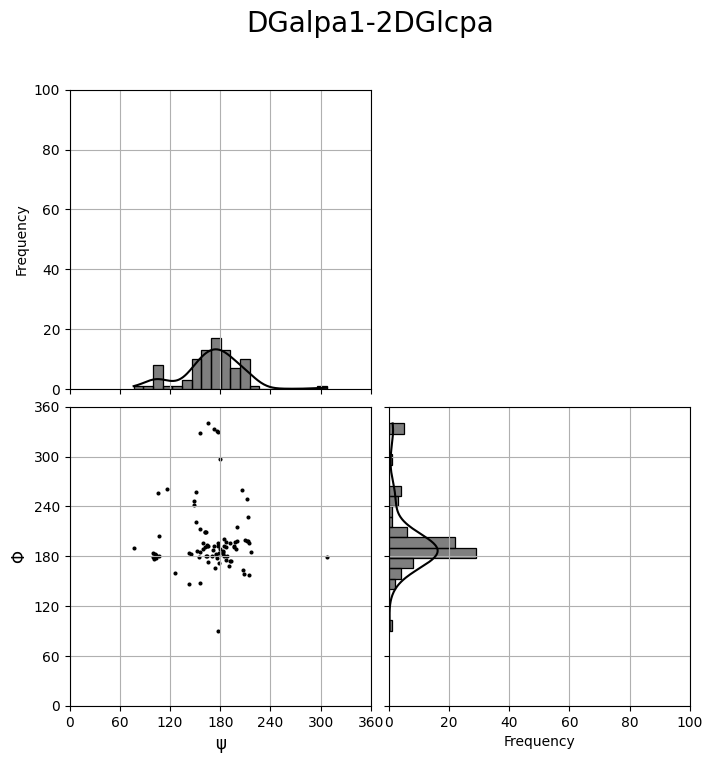

In [16]:
instant1.plot(torsions=instant1.torsions, title='DGalpa1-6DGlcpa',max_histogram_scale=100,step_histogram_tick=20)